In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms,datasets

In [2]:
mnist = datasets.MNIST('/',train=True,
                       transform=transforms.ToTensor(),
                       download=True)
mnist_test = datasets.MNIST('/',train=False,
                       transform=transforms.ToTensor(),
                       download=True)

In [3]:
img,label = mnist[0]

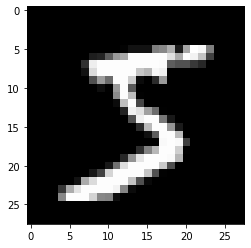

In [4]:
plt.imshow(img.permute(1,2,0).numpy(),cmap='gray')
plt.show()

In [5]:
label

5

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
from torch import nn,optim

In [12]:
imgs = torch.stack([imgt for imgt,_ in mnist])

In [13]:
imgs = imgs.permute(0,2,3,1)

In [14]:
imgs.shape

torch.Size([60000, 28, 28, 1])

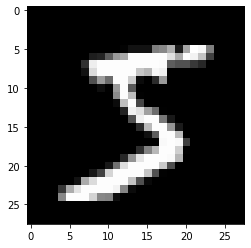

In [15]:
plt.imshow(imgs[0].numpy(),cmap='gray')

In [16]:
imgs.mean()

tensor(0.1307)

In [17]:
mean = imgs.mean()

In [18]:
std = imgs.std()

In [19]:
mnist_n = datasets.MNIST('/',train=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                       transforms.Normalize(mean,std)]),
                       download=True)

In [20]:
i,_ = mnist_n[0]

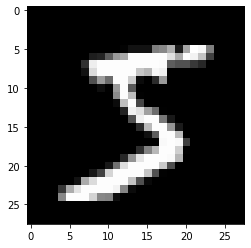

In [21]:
plt.imshow(i.permute(1,2,0).squeeze().numpy(),cmap='gray')

In [54]:
model = nn.Sequential(nn.Linear(784,256),
                      nn.LeakyReLU(),
                      nn.Linear(256,128),
                      nn.LeakyReLU(),
                      nn.Linear(128,128),
                      nn.ReLU(),
                     nn.Linear(128,10),
                     nn.Softmax())

In [20]:
model

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=128, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)

In [61]:
optimizer = optim.Adam(model.parameters())

In [60]:
loss_f = nn.CrossEntropyLoss()

In [22]:
model = nn.Sequential(nn.Conv2d(1,16,3))

In [24]:
model(img.unsqueeze(0))

tensor([[[[ 0.3094,  0.3094,  0.3094,  ...,  0.3094,  0.3094,  0.3094],
          [ 0.3094,  0.3094,  0.3094,  ...,  0.3094,  0.3094,  0.3094],
          [ 0.3094,  0.3094,  0.3094,  ...,  0.3094,  0.3094,  0.3094],
          ...,
          [ 0.3094,  0.3094,  0.2048,  ...,  0.3094,  0.3094,  0.3094],
          [ 0.3094,  0.3094,  0.3285,  ...,  0.3094,  0.3094,  0.3094],
          [ 0.3094,  0.3094,  0.3094,  ...,  0.3094,  0.3094,  0.3094]],

         [[-0.1492, -0.1492, -0.1492,  ..., -0.1492, -0.1492, -0.1492],
          [-0.1492, -0.1492, -0.1492,  ..., -0.1492, -0.1492, -0.1492],
          [-0.1492, -0.1492, -0.1492,  ..., -0.1492, -0.1492, -0.1492],
          ...,
          [-0.1492, -0.1492, -0.0701,  ..., -0.1492, -0.1492, -0.1492],
          [-0.1492, -0.1492, -0.2087,  ..., -0.1492, -0.1492, -0.1492],
          [-0.1492, -0.1492, -0.1492,  ..., -0.1492, -0.1492, -0.1492]],

         [[-0.2901, -0.2901, -0.2901,  ..., -0.2901, -0.2901, -0.2901],
          [-0.2901, -0.2901, -

In [25]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [32]:
l = nn.Linear(784,10)

In [34]:
loss = nn.CrossEntropyLoss()

In [56]:
model = nn.Sequential(nn.Conv2d(1,32,kernel_size=3,padding=1),
                     nn.LeakyReLU(),
                     nn.MaxPool2d(2),
                     nn.Conv2d(32,16,3,padding=1),
                     nn.Tanh(),
                     nn.MaxPool2d(2),
                     nn.Conv2d(16,8,3,padding=1),
                     nn.LeakyReLU(),
                     nn.Flatten(),
                     nn.Linear(392,128),
                     nn.LeakyReLU(),
                     nn.Linear(128,64),
                     nn.Tanh(),
                     nn.Linear(64,10),
                     nn.Softmax(dim=1))

In [45]:
out = model(img.unsqueeze(0))

In [46]:
out

tensor([[0.1122, 0.1009, 0.1029, 0.0944, 0.0870, 0.0997, 0.1009, 0.1081, 0.0907,
         0.1032]], grad_fn=<SoftmaxBackward>)

In [55]:
loss(out,torch.tensor([1]))

tensor(2.3017, grad_fn=<NllLossBackward>)

In [57]:
mnist_dls = torch.utils.data.DataLoader(mnist_n,batch_size=64)

    

In [59]:
for i,j in mnist_dls:
    print(i.shape)
    print(j.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
for epochs in range(10):
    for img,label in mnist_dls:
        out = model(img)
        loss = loss_f(out,torch.tensor(label))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epochs}: Loss:{loss}")

<ipython-input-64-3e1509a43056>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = loss_f(out,torch.tensor(label))


Epoch 0: Loss:1.4621154069900513
Epoch 1: Loss:1.4612998962402344
Epoch 2: Loss:1.4611989259719849
Epoch 3: Loss:1.4611916542053223
Epoch 4: Loss:1.4611555337905884
